In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [76]:
#Read in csv file
df = pd.read_csv("election_data.csv")

#Filter for 2012 and 2016
df_2012 = df[df["year"] == 2012]
df_2016 = df[df["year"] == 2016]

In [80]:
#Create pivot table with candidates as columns and votes as vales
pivot_2012 = df_2012.pivot(columns = "candidate",  values = "candidatevotes")

#Merge pivot table with original 2012 dataframe
merged_2012 = df_2012.merge(pivot_2012, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2012 = merged_2012.groupby(["state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2012 = merged_grouped_2012.iloc[:,-3:].astype(int)

#Create total votes column
election_2012["Total Votes"] = election_2012.sum(1)


#Create column for winner and margin of victory
election_2012["Winner"] = np.where(election_2012['Barack Obama']>election_2012["Mitt Romney"], 'Barack Obama', 'Mitt Romney')
election_2012["Margin"] = np.where(election_2012["Winner"]=="Mitt Romney", 
                                   election_2012["Mitt Romney"]-election_2012["Barack Obama"],
                                   election_2012["Barack Obama"]-election_2012["Mitt Romney"])

election_2012.head()

Barack Obama  Mitt Romney  Other  Total Votes  \
state_po county                                                       
AK       District 1           1518         5899    305         7722   
         District 10          1344         4928    298         6570   
         District 11          2222         6057    352         8631   
         District 12          1901         4300    281         6482   
         District 13          2425         3078    204         5707   

                           Winner  Margin  
state_po county                            
AK       District 1   Mitt Romney    4381  
         District 10  Mitt Romney    3584  
         District 11  Mitt Romney    3835  
         District 12  Mitt Romney    2399  
         District 13  Mitt Romney     653

In [57]:
#Find total votes for Barack Obama 2012
obama_total = election_2012["Barack Obama"].sum()

#Find total votes for Mitt Romney 2012
romney_total = election_2012["Mitt Romney"].sum()

#Find total votes for Other 2012
other_2012_total = election_2012["Other"].sum()

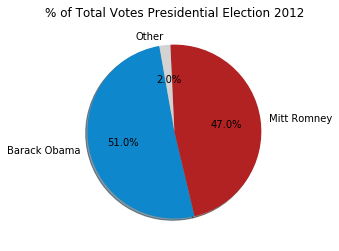

In [29]:
#Add labels
labels_2012 = ["Barack Obama", "Mitt Romney", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2012")

#Set the values of each section of the pie chart
sizes_2012 = [obama_total, romney_total, other_2012_total]

#Set the colors of each section of the pie chart
colors_2012 = ["#0e87cc", "firebrick", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2012, labels=labels_2012, colors=colors_2012,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [62]:
#Create pivot table with candidates as columns and votes as vales
pivot_2016 = df_2016.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2016 dataframe
merged_2016 = df_2016.merge(pivot_2016, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
#merged_grouped_2016 = merged_2016.groupby(["state_po", "county"]).sum()
merged_grouped_2016 = merged_2016.groupby(["state_po", "FIPS"]).sum()

merged_grouped_2016 = merged_grouped_2016.reset_index()

#Select last three rows and transform to ints
election_2016 = merged_grouped_2016.iloc[:,-3:].astype(int)

#Create total votes column
election_2016["Total Votes"] = election_2016.sum(1)

#Create column for winner and margin of victory
election_2016["Winner"] = np.where(election_2016['Hillary Clinton']>election_2016["Donald Trump"], 'Hillary Clinton', 'Donald Trump')
election_2016["Margin"] = np.where(election_2016["Winner"]=="Donald Trump", 
                                   election_2016["Donald Trump"]-election_2016["Hillary Clinton"],
                                   election_2016["Hillary Clinton"]-election_2016["Donald Trump"])
election_2016.head()


Donald Trump  Hillary Clinton  Other  Total Votes           Winner  Margin
0          3180             2573    885         6638     Donald Trump     607
1          3188             1585    719         5492     Donald Trump    1603
2          5403             1241    969         7613     Donald Trump    4162
3          4070             4162   1289         9521  Hillary Clinton      92
4          3683             3187   1036         7906     Donald Trump     496

In [7]:
#Find total votes for Donald Trump 2016
trump_total = election_2016["Donald Trump"].sum()

#Find total votes for Hillary Clinton 2016
clinton_total = election_2016["Hillary Clinton"].sum()

#Find total votes for Other 2016
other_2016_total = election_2016["Other"].sum()

trump_total

62978290

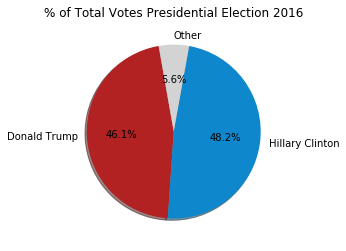

In [8]:
#Add labels
labels_2016 = ["Donald Trump", "Hillary Clinton", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2016")

#Set the values of each section of the pie chart
sizes_2016 = [trump_total, clinton_total, other_2016_total]

#Set the colors of each section of the pie chart
colors_2016 = ["firebrick", "#0e87cc", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2016, labels=labels_2016, colors=colors_2016,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [9]:
#Join 2012 and 2016 dataframes
election_df = election_2012.join(election_2016, rsuffix = "_2016", lsuffix="_2012")

#Show results
election_df.head(10)

Barack Obama  Mitt Romney  Other_2012  Total Votes_2012  \
state_po county                                                                 
AK       District 1           1518         5899         305              7722   
         District 10          1344         4928         298              6570   
         District 11          2222         6057         352              8631   
         District 12          1901         4300         281              6482   
         District 13          2425         3078         204              5707   
         District 14          3340         3453         275              7068   
         District 15          3283         2875         293              6451   
         District 16          4013         2876         292              7181   
         District 17          2853         1542         194              4589   
         District 18          4247         2369         314              6930   

                       Winner_2012  Margin_2012  Donald Trump  \
state_po county                                                 
AK       District 1    Mitt Romney         4381          3180   
         District 10   Mitt Romney         3584          6255   
         District 11   Mitt Romney         3835          6444   
         District 12   Mitt Romney         2399          6629   
         District 13   Mitt Romney          653          4028   
         District 14   Mitt Romney          113          5978   
         District 15  Barack Obama          408          2525   
         District 16  Barack Obama         1137          3203   
         District 17  Barack Obama         1311          2618   
         District 18  Barack Obama         1878          2684   

                      Hillary Clinton  Other_2016  Total Votes_2016  \
state_po county                                                       
AK       District 1              2573         885              6638   
         District 10             1808         977              9040   
         District 11             2142        1103              9689   
         District 12             1928         986              9543   
         District 13             1684         821              6533   
         District 14             3043        1399             10420   
         District 15             1828         629              4982   
         District 16             3294         939              7436   
         District 17             3290         880              6788   
         District 18             3909         809              7402   

                          Winner_2016  Margin_2016  
state_po county                                     
AK       District 1      Donald Trump          607  
         District 10     Donald Trump         4447  
         District 11     Donald Trump         4302  
         District 12     Donald Trump         4701  
         District 13     Donald Trump         2344  
         District 14     Donald Trump         2935  
         District 15     Donald Trump          697  
         District 16  Hillary Clinton           91  
         District 17  Hillary Clinton          672  
         District 18  Hillary Clinton         1225

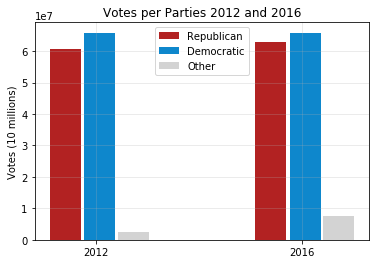

In [10]:
republican = (romney_total, trump_total)
democratic = (obama_total, clinton_total)
other = (other_2012_total, other_2016_total)

#The x locations for the groups
ind = np.arange(len(democratic)) 

#The width of the bars
width = 0.15  

#Create the bars
fig, ax = plt.subplots()
rects1 = plt.bar(ind - width, republican, width, label='Republican', color="firebrick")
rects2 = plt.bar(ind + width/9, democratic, width, label='Democratic', color="#0e87cc")
rects3 = plt.bar(ind + width*1.2, other, width, label='Other', color="lightgray")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Votes (10 millions)')
plt.title('Votes per Parties 2012 and 2016')

#Add legend
plt.legend(loc= "upper center")

#Add grid
plt.grid(alpha= 0.3)

#Set ticks
plt.xticks(ind)

#Add tick labels
ax.set_xticklabels(('2012', '2016'))

#Show bar chart
plt.show()

In [11]:
Dem_Rep = len(election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")])
Rep_Dem = len(election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")])

In [12]:
rep_dem_df = election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")]
rep_dem_df.describe()
dem_rep_df = election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")]
dem_rep_df.describe()

Barack Obama    Mitt Romney    Other_2012  Total Votes_2012  \
count     227.000000     227.000000    227.000000        227.000000   
mean    18061.268722   15554.013216   1124.484581      34739.766520   
std     32810.677462   28992.054773   4009.362497      64566.472766   
min       439.000000     314.000000      6.000000        761.000000   
25%      3617.500000    3289.000000    105.000000       7212.500000   
50%      8106.000000    6556.000000    293.000000      15770.000000   
75%     17186.000000   14675.000000    918.500000      33258.000000   
max    287519.000000  243258.000000  55481.000000     586258.000000   

        Margin_2012   Donald Trump  Hillary Clinton    Other_2016  \
count    227.000000     227.000000       227.000000    227.000000   
mean    2507.255507   18381.647577     15534.726872   1972.114537   
std     4646.218734   35795.167046     31671.184747   3092.809771   
min        3.000000     368.000000       353.000000      8.000000   
25%      329.500000    3815.500000      2681.000000    345.500000   
50%      956.000000    7958.000000      6305.000000   1007.000000   
75%     2871.500000   17637.000000     13822.500000   2324.000000   
max    44261.000000  350570.000000    303951.000000  26733.000000   

       Total Votes_2016   Margin_2016  
count        227.000000    227.000000  
mean       35888.488987   2846.920705  
std        70316.525903   5685.515700  
min          767.000000     15.000000  
25%         7312.000000    577.500000  
50%        15627.000000   1386.000000  
75%        33433.500000   2911.000000  
max       681254.000000  48348.000000

In [13]:
election_df["Total_Votes_Percent_Change"] = round((election_df["Total Votes_2016"] - election_df["Total Votes_2012"]) / election_df["Total Votes_2012"] * 100,2)

In [14]:
election_df.describe()

Barack Obama    Mitt Romney    Other_2012  Total Votes_2012  \
count  3.149000e+03    3149.000000   3149.000000      3.149000e+03   
mean   2.087560e+04   19261.604954    834.616069      4.097182e+04   
std    7.363943e+04   44361.388665   2934.110532      1.163329e+05   
min    5.000000e+00      54.000000      0.000000      6.400000e+01   
25%    1.572000e+03    2921.000000     76.000000      4.871000e+03   
50%    3.959000e+03    6294.000000    184.000000      1.057200e+04   
75%    1.125900e+04   16032.000000    517.000000      2.814200e+04   
max    2.216903e+06  885333.000000  78831.000000      3.181067e+06   

        Margin_2012   Donald Trump  Hillary Clinton     Other_2016  \
count  3.149000e+03    3149.000000     3.149000e+03    3149.000000   
mean   1.007506e+04   19999.456970     2.090832e+04    2436.293426   
std    4.127307e+04   42960.520372     8.010525e+04    7471.710363   
min    1.000000e+00      58.000000     4.000000e+00       3.000000   
25%    1.052000e+03    3214.000000     1.186000e+03     185.000000   
50%    2.545000e+03    7067.000000     3.170000e+03     512.000000   
75%    6.469000e+03   17639.000000     9.654000e+03    1628.000000   
max    1.331570e+06  769743.000000     2.464364e+06  200201.000000   

       Total Votes_2016   Margin_2016  Total_Votes_Percent_Change  
count      3.149000e+03  3.149000e+03                 3149.000000  
mean       4.334407e+04  1.210735e+04                    3.155300  
std        1.251048e+05  4.886121e+04                    6.930254  
min        6.500000e+01  8.000000e+00                  -42.170000  
25%        4.982000e+03  1.583000e+03                   -0.800000  
50%        1.089400e+04  3.755000e+03                    3.040000  
75%        2.947200e+04  8.517000e+03                    6.810000  
max        3.434308e+06  1.694621e+06                   66.210000

In [15]:
demographic_df = pd.read_json("usa-2016-presidential-election-by-county.json")
demographic_df

datasetid  \
0     usa-2016-presidential-election-by-county   
1     usa-2016-presidential-election-by-county   
2     usa-2016-presidential-election-by-county   
3     usa-2016-presidential-election-by-county   
4     usa-2016-presidential-election-by-county   
5     usa-2016-presidential-election-by-county   
6     usa-2016-presidential-election-by-county   
7     usa-2016-presidential-election-by-county   
8     usa-2016-presidential-election-by-county   
9     usa-2016-presidential-election-by-county   
10    usa-2016-presidential-election-by-county   
11    usa-2016-presidential-election-by-county   
12    usa-2016-presidential-election-by-county   
13    usa-2016-presidential-election-by-county   
14    usa-2016-presidential-election-by-county   
15    usa-2016-presidential-election-by-county   
16    usa-2016-presidential-election-by-county   
17    usa-2016-presidential-election-by-county   
18    usa-2016-presidential-election-by-county   
19    usa-2016-presidential-election-by-county   
20    usa-2016-presidential-election-by-county   
21    usa-2016-presidential-election-by-county   
22    usa-2016-presidential-election-by-county   
23    usa-2016-presidential-election-by-county   
24    usa-2016-presidential-election-by-county   
25    usa-2016-presidential-election-by-county   
26    usa-2016-presidential-election-by-county   
27    usa-2016-presidential-election-by-county   
28    usa-2016-presidential-election-by-county   
29    usa-2016-presidential-election-by-county   
...                                        ...   
3113  usa-2016-presidential-election-by-county   
3114  usa-2016-presidential-election-by-county   
3115  usa-2016-presidential-election-by-county   
3116  usa-2016-presidential-election-by-county   
3117  usa-2016-presidential-election-by-county   
3118  usa-2016-presidential-election-by-county   
3119  usa-2016-presidential-election-by-county   
3120  usa-2016-presidential-election-by-county   
3121  usa-2016-presidential-election-by-county   
3122  usa-2016-presidential-election-by-county   
3123  usa-2016-presidential-election-by-county   
3124  usa-2016-presidential-election-by-county   
3125  usa-2016-presidential-election-by-county   
3126  usa-2016-presidential-election-by-county   
3127  usa-2016-presidential-election-by-county   
3128  usa-2016-presidential-election-by-county   
3129  usa-2016-presidential-election-by-county   
3130  usa-2016-presidential-election-by-county   
3131  usa-2016-presidential-election-by-county   
3132  usa-2016-presidential-election-by-county   
3133  usa-2016-presidential-election-by-county   
3134  usa-2016-presidential-election-by-county   
3135  usa-2016-presidential-election-by-county   
3136  usa-2016-presidential-election-by-county   
3137  usa-2016-presidential-election-by-county   
3138  usa-2016-presidential-election-by-county   
3139  usa-2016-presidential-election-by-county   
3140  usa-2016-presidential-election-by-county   
3141  usa-2016-presidential-election-by-county   
3142  usa-2016-presidential-election-by-county   

                                                 fields  \
0     {'unemployment': 0.07100000000000001, 'other08...   
1     {'unemployment': 0.066, 'other08': 59, 'median...   
2     {'unemployment': 0.07200000000000001, 'other08...   
3     {'unemployment': 0.074, 'other08': 116, 'media...   
4     {'unemployment': 0.08, 'other08': 4791, 'media...   
5     {'unemployment': 0.098, 'other08': 138, 'media...   
6     {'unemployment': 0.095, 'other08': 191, 'media...   
7     {'unemployment': 0.091, 'other08': 847, 'media...   
8     {'adult_obesity': 0.323, 'spring_tavg': 334.25...   
9     {'unemployment': 0.075, 'other08': 112, 'media...   
10    {'unemployment': 0.075, 'other08': 1585, 'medi...   
11    {'unemployment': 0.066, 'other08': 1495, 'medi...   
12    {'unemployment': 0.08, 'other08': 821, 'median...   
13    {'unemployment': 0.07, 'other08': 604, 'median...   
14    {'unemployment': 0.074, 'other08': 166, 'medi

In [16]:
with open("usa-2016-presidential-election-by-county.json", 'rb') as f:
    data = json.load(f)

fields_to_keep = ['fips', 'state', 'county', 'median_age', 'unemployment','total_population', 'graduate_degree', 'at_least_bachelor_s_degree', 'at_least_high_school_diploma', 'less_than_high_school',
                 'median_earnings_2010_dollars', 'white', 'black', 'hispanic', 'asian',
                  'farming_fishing_and_forestry_occupations', 'construction_extraction_maintenance_and_repair_occupations', 
                 'management_professional_and_related_occupations', 'production_transportation_and_material_moving_occupations',
                 'sales_and_office_occupations', 'service_occupations']
final_data = {k:[] for k in fields_to_keep}
for d in data:
    for f in fields_to_keep:
        value = d['fields'].get(f, 'NA')
        if f not in fields_to_keep:
            continue
        final_data[f].append(value)
    
#make the df here
df = pd.DataFrame(final_data)
df

fips           state                             county  median_age  \
0     27017       Minnesota          Carlton County, Minnesota        40.1   
1     20127          Kansas              Morris County, Kansas        45.9   
2     40107        Oklahoma          Okfuskee County, Oklahoma        40.3   
3     30085         Montana          Roosevelt County, Montana        32.0   
4     36055        New York            Monroe County, New York        38.1   
5     51117        Virginia       Mecklenburg County, Virginia        45.1   
6     13143         Georgia           Haralson County, Georgia        38.0   
7     23017           Maine               Oxford County, Maine        43.6   
8     02013          Alaska     Aleutians East Borough, Alaska        38.5   
9     21123        Kentucky             Larue County, Kentucky        39.1   
10    37021  North Carolina    Buncombe County, North Carolina        40.6   
11    42041    Pennsylvania    Cumberland County, Pennsylvania        39.9   
12    45015  South Carolina    Berkeley County, South Carolina        34.3   
13    18081         Indiana            Johnson County, Indiana        36.4   
14    18179         Indiana              Wells County, Indiana        40.0   
15    55009       Wisconsin            Brown County, Wisconsin        36.0   
16    55037       Wisconsin         Florence County, Wisconsin        47.3   
17    28127     Mississippi        Simpson County, Mississippi        37.6   
18    05143        Arkansas        Washington County, Arkansas        30.6   
19    06047      California          Merced County, California        29.3   
20    13111         Georgia             Fannin County, Georgia        47.2   
21    48163           Texas                 Frio County, Texas        31.7   
22    48419           Texas               Shelby County, Texas        38.4   
23    49031            Utah                 Piute County, Utah        37.4   
24    30101         Montana              Toole County, Montana        41.9   
25    51810        Virginia      Virginia Beach city, Virginia        34.6   
26    53017      Washington         Douglas County, Washington        36.6   
27    29133        Missouri       Mississippi County, Missouri        38.9   
28    48167           Texas            Galveston County, Texas        37.1   
29    48177           Texas             Gonzales County, Texas        36.4   
...     ...             ...                                ...         ...   
3113  31031        Nebraska            Cherry County, Nebraska        43.9   
3114  27151       Minnesota            Swift County, Minnesota        44.2   
3115  47141       Tennessee           Putnam County, Tennessee        35.7   
3116  54011   West Virginia       Cabell County, West Virginia        38.9   
3117  54109   West Virginia      Wyoming County, West Virginia        42.3   
3118  05013        Arkansas           Calhoun County, Arkansas        40.4   
3119  48447           Texas         Throckmorton County, Texas        47.9   
3120  41059          Oregon            Umatilla County, Oregon        35.6   
3121  47095       Tennessee             Lake County, Tennessee        38.4   
3122  54069   West Virginia         Ohio County, West Virginia        43.0   
3123  41053          Oregon                Polk County, Oregon        37.2   
3124  45029  South Carolina    Colleton County, South Carolina        39.5   
3125  05039        Arkansas            Dallas County, Arkansas        41.7   
3126  12003         Florida              Baker County, Florida        36.1   
3127  26017        Michigan               Bay County, Michigan        41.2   
3128  13307         Georgia            Webster County, Georgia        40.4   
3129  17051        Illinois           Fayette County, Illinois        40.0   
3130  28133     Mississippi      Sunflower County, Mississippi        33.2   
3131  37183  North Carolina        Wake County, North Carolina        34.1   
3132  42091    Pennsylvania  

In [17]:
all_fields = []
for d in data:
    fields = d['fields']
    all_fields.extend(fields)
    
set(all_fields)

{'acfs',
 'adult_obesity',
 'adult_smoking',
 'adults_65_and_older_living_in_poverty',
 'african_american_population',
 'amerindian',
 'annual_prcp',
 'annual_tavg',
 'annual_tmax',
 'annual_tmin',
 'asian',
 'asian_american_population',
 'at_least_bachelor_s_degree',
 'at_least_high_school_diploma',
 'autumn_prcp',
 'autumn_tavg',
 'autumn_tmax',
 'autumn_tmin',
 'black',
 'ca',
 'cfs',
 'child_poverty_living_in_families_below_the_poverty_line',
 'children_in_single_parent_households',
 'children_under_6_living_in_poverty',
 'construction_extraction_maintenance_and_repair_occupations',
 'county',
 'dem08',
 'dem08_frac',
 'dem08_frac2',
 'dem12',
 'dem12_frac',
 'dem12_frac2',
 'dem16_frac',
 'dem16_frac2',
 'diabetes',
 'elevation',
 'elevation_bins',
 'est_votes_remaining',
 'farming_fishing_and_forestry_occupations',
 'fips',
 'geo_shape',
 'gini_coefficient',
 'graduate_degree',
 'green16_frac',
 'hispanic',
 'hiv_prevalence_rate',
 'homicide_rate',
 'infant_mortality',
 'injury_d

In [18]:
len(final_data['median_age'])

3143

In [19]:
len(final_data['unemployment'])

3143

In [23]:
rep_dem_df.head()

Barack Obama  Mitt Romney  Other_2012  Total Votes_2012  \
state_po county                                                                 
AK       District 20          3081         4544         339              7964   
         District 21          3316         5262         288              8866   
         District 33          2716         4289         466              7471   
         District 4           2864         3586         337              6787   
CA       Nevada              24663        24986        2027             51676   

                      Winner_2012  Margin_2012  Donald Trump  Hillary Clinton  \
state_po county                                                                 
AK       District 20  Mitt Romney         1463          2187             4151   
         District 21  Mitt Romney         1946          3479             4224   
         District 33  Mitt Romney         1573          2732             5978   
         District 4   Mitt Romney          722          4070             4162   
CA       Nevada       Mitt Romney          323         23365            26053   

                      Other_2016  Total Votes_2016      Winner_2016  \
state_po county                                                       
AK       District 20         802              7140  Hillary Clinton   
         District 21         944              8647  Hillary Clinton   
         District 33        1224              9934  Hillary Clinton   
         District 4         1289              9521  Hillary Clinton   
CA       Nevada             5517             54935  Hillary Clinton   

                      Margin_2016  
state_po county                    
AK       District 20         1964  
         District 21          745  
         District 33         3246  
         District 4            92  
CA       Nevada              2688